# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 4417 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 4417) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   7 of 4417) |                       | Elapsed Time: 0:00:25 ETA: 4:32:38

  0% (  21 of 4417) |                       | Elapsed Time: 0:00:26 ETA: 1:31:21

  0% (  37 of 4417) |                       | Elapsed Time: 0:00:26 ETA: 0:52:05

  1% (  56 of 4417) |                       | Elapsed Time: 0:00:26 ETA: 0:37:11

  1% (  71 of 4417) |                       | Elapsed Time: 0:00:26 ETA: 0:01:03

  1% (  87 of 4417) |                       | Elapsed Time: 0:00:27 ETA: 0:01:01

  2% ( 102 of 4417) |                       | Elapsed Time: 0:00:27 ETA: 0:01:00

  2% ( 119 of 4417) |                       | Elapsed Time: 0:00:27 ETA: 0:01:00

  3% ( 135 of 4417) |                       | Elapsed Time: 0:00:27 ETA: 0:00:59

  3% ( 150 of 4417) |                       | Elapsed Time: 0:00:27 ETA: 0:00:59

  3% ( 166 of 4417) |                       | Elapsed Time: 0:00:28 ETA: 0:00:58

  4% ( 182 of 4417) |                       | Elapsed Time: 0:00:28 ETA: 0:00:57

  4% ( 197 of 4417) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:58

  5% ( 221 of 4417) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:56

  5% ( 238 of 4417) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:53

  5% ( 253 of 4417) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:54

  6% ( 267 of 4417) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:55

  6% ( 285 of 4417) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:54

  6% ( 301 of 4417) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:56

  7% ( 317 of 4417) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:56

  7% ( 340 of 4417) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:54

  8% ( 356 of 4417) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:54

  8% ( 372 of 4417) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:53

  8% ( 395 of 4417) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:53

  9% ( 411 of 4417) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:53

  9% ( 427 of 4417) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:53

 10% ( 450 of 4417) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:52

 10% ( 466 of 4417) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:52

 10% ( 482 of 4417) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:52

 11% ( 505 of 4417) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:51

 11% ( 521 of 4417) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:51

 12% ( 537 of 4417) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:51

 12% ( 553 of 4417) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:50

 12% ( 569 of 4417) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:50

 13% ( 584 of 4417) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:51

 13% ( 600 of 4417) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:52

 13% ( 616 of 4417) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:51

 14% ( 631 of 4417) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:52

 14% ( 646 of 4417) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:51

 15% ( 663 of 4417) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:51

 15% ( 679 of 4417) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:51

 15% ( 694 of 4417) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:51

 16% ( 710 of 4417) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:51

 16% ( 726 of 4417) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:49

 16% ( 742 of 4417) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:49

 17% ( 758 of 4417) |###                    | Elapsed Time: 0:00:36 ETA: 0:00:48

 17% ( 781 of 4417) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:46

 18% ( 797 of 4417) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:46

 18% ( 813 of 4417) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:46

 18% ( 829 of 4417) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:46

 19% ( 846 of 4417) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:45

 19% ( 863 of 4417) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:45

 19% ( 877 of 4417) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:47

 20% ( 891 of 4417) |####                   | Elapsed Time: 0:00:37 ETA: 0:00:49

 20% ( 906 of 4417) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:49

 20% ( 922 of 4417) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:50

 21% ( 939 of 4417) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:51

 21% ( 955 of 4417) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:48

 22% ( 972 of 4417) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:47

 22% ( 994 of 4417) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:44

 22% (1011 of 4417) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:43

 23% (1028 of 4417) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:42

 23% (1050 of 4417) |#####                  | Elapsed Time: 0:00:39 ETA: 0:00:41

 24% (1067 of 4417) |#####                  | Elapsed Time: 0:00:40 ETA: 0:00:41

 24% (1082 of 4417) |#####                  | Elapsed Time: 0:00:40 ETA: 0:00:42

 24% (1097 of 4417) |#####                  | Elapsed Time: 0:00:40 ETA: 0:00:43

 25% (1113 of 4417) |#####                  | Elapsed Time: 0:00:40 ETA: 0:00:45

 25% (1130 of 4417) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:45

 25% (1146 of 4417) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:45

 26% (1167 of 4417) |######                 | Elapsed Time: 0:00:41 ETA: 0:00:45

 26% (1183 of 4417) |######                 | Elapsed Time: 0:00:41 ETA: 0:00:44

 27% (1200 of 4417) |######                 | Elapsed Time: 0:00:42 ETA: 0:00:43

 27% (1222 of 4417) |######                 | Elapsed Time: 0:00:42 ETA: 0:00:42

 28% (1238 of 4417) |######                 | Elapsed Time: 0:00:42 ETA: 0:00:41

 28% (1254 of 4417) |######                 | Elapsed Time: 0:00:42 ETA: 0:00:40

 28% (1270 of 4417) |######                 | Elapsed Time: 0:00:42 ETA: 0:00:41

 29% (1286 of 4417) |######                 | Elapsed Time: 0:00:43 ETA: 0:00:41

 29% (1303 of 4417) |######                 | Elapsed Time: 0:00:43 ETA: 0:00:40

 29% (1319 of 4417) |######                 | Elapsed Time: 0:00:43 ETA: 0:00:41

 30% (1332 of 4417) |######                 | Elapsed Time: 0:00:43 ETA: 0:00:42

 30% (1348 of 4417) |#######                | Elapsed Time: 0:00:44 ETA: 0:00:41

 30% (1364 of 4417) |#######                | Elapsed Time: 0:00:44 ETA: 0:00:42

 31% (1381 of 4417) |#######                | Elapsed Time: 0:00:44 ETA: 0:00:42

 31% (1399 of 4417) |#######                | Elapsed Time: 0:00:44 ETA: 0:00:40

 32% (1417 of 4417) |#######                | Elapsed Time: 0:00:44 ETA: 0:00:37

 32% (1436 of 4417) |#######                | Elapsed Time: 0:00:45 ETA: 0:00:38

 32% (1454 of 4417) |#######                | Elapsed Time: 0:00:45 ETA: 0:00:36

 33% (1471 of 4417) |#######                | Elapsed Time: 0:00:45 ETA: 0:00:36

 33% (1491 of 4417) |#######                | Elapsed Time: 0:00:45 ETA: 0:00:37

 34% (1507 of 4417) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:37

 34% (1524 of 4417) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:36

 35% (1546 of 4417) |########               | Elapsed Time: 0:00:46 ETA: 0:00:37

 35% (1563 of 4417) |########               | Elapsed Time: 0:00:46 ETA: 0:00:36

 35% (1581 of 4417) |########               | Elapsed Time: 0:00:46 ETA: 0:00:35

 36% (1602 of 4417) |########               | Elapsed Time: 0:00:47 ETA: 0:00:35

 36% (1619 of 4417) |########               | Elapsed Time: 0:00:47 ETA: 0:00:35

 37% (1637 of 4417) |########               | Elapsed Time: 0:00:47 ETA: 0:00:34

 37% (1657 of 4417) |########               | Elapsed Time: 0:00:47 ETA: 0:00:34

 37% (1674 of 4417) |########               | Elapsed Time: 0:00:48 ETA: 0:00:34

 38% (1691 of 4417) |########               | Elapsed Time: 0:00:49 ETA: 0:01:01

 38% (1712 of 4417) |########               | Elapsed Time: 0:00:49 ETA: 0:01:01

 39% (1726 of 4417) |########               | Elapsed Time: 0:00:49 ETA: 0:01:01

 39% (1743 of 4417) |#########              | Elapsed Time: 0:00:49 ETA: 0:01:01

 39% (1760 of 4417) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:34

 40% (1775 of 4417) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:34

 40% (1791 of 4417) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:35

 40% (1807 of 4417) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:33

 41% (1832 of 4417) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:33

 41% (1850 of 4417) |#########              | Elapsed Time: 0:00:51 ETA: 0:00:32

 42% (1868 of 4417) |#########              | Elapsed Time: 0:00:51 ETA: 0:00:31

 42% (1887 of 4417) |#########              | Elapsed Time: 0:00:51 ETA: 0:00:30

 43% (1905 of 4417) |#########              | Elapsed Time: 0:00:51 ETA: 0:00:30

 43% (1923 of 4417) |##########             | Elapsed Time: 0:00:52 ETA: 0:00:29

 43% (1941 of 4417) |##########             | Elapsed Time: 0:00:52 ETA: 0:00:30

 44% (1957 of 4417) |##########             | Elapsed Time: 0:00:52 ETA: 0:00:30

 44% (1973 of 4417) |##########             | Elapsed Time: 0:00:52 ETA: 0:00:31

 45% (1988 of 4417) |##########             | Elapsed Time: 0:00:52 ETA: 0:00:32

 45% (2006 of 4417) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:32

 45% (2022 of 4417) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:32

 46% (2043 of 4417) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:31

 46% (2057 of 4417) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:31

 46% (2074 of 4417) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:30

 47% (2099 of 4417) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:29

 47% (2116 of 4417) |###########            | Elapsed Time: 0:00:54 ETA: 0:00:28

 48% (2133 of 4417) |###########            | Elapsed Time: 0:00:54 ETA: 0:00:28

 48% (2154 of 4417) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:27

 49% (2169 of 4417) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:28

 49% (2186 of 4417) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:28

 50% (2209 of 4417) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:27

 50% (2226 of 4417) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:27

 50% (2243 of 4417) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:27

 51% (2264 of 4417) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:26

 51% (2282 of 4417) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:26

 52% (2299 of 4417) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:26

 52% (2319 of 4417) |############           | Elapsed Time: 0:00:57 ETA: 0:00:26

 52% (2337 of 4417) |############           | Elapsed Time: 0:00:57 ETA: 0:00:25

 53% (2355 of 4417) |############           | Elapsed Time: 0:00:57 ETA: 0:00:25

 53% (2375 of 4417) |############           | Elapsed Time: 0:00:57 ETA: 0:00:24

 54% (2390 of 4417) |############           | Elapsed Time: 0:00:57 ETA: 0:00:25

 54% (2408 of 4417) |############           | Elapsed Time: 0:00:58 ETA: 0:00:25

 55% (2430 of 4417) |############           | Elapsed Time: 0:00:58 ETA: 0:00:24

 55% (2447 of 4417) |############           | Elapsed Time: 0:00:58 ETA: 0:00:24

 55% (2464 of 4417) |############           | Elapsed Time: 0:00:58 ETA: 0:00:24

 56% (2485 of 4417) |############           | Elapsed Time: 0:00:59 ETA: 0:00:23

 56% (2499 of 4417) |#############          | Elapsed Time: 0:00:59 ETA: 0:00:24

 56% (2516 of 4417) |#############          | Elapsed Time: 0:00:59 ETA: 0:00:24

 57% (2540 of 4417) |#############          | Elapsed Time: 0:00:59 ETA: 0:00:24

 57% (2556 of 4417) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:24

 58% (2570 of 4417) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:24

 58% (2585 of 4417) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:24

 58% (2603 of 4417) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:25

 59% (2621 of 4417) |#############          | Elapsed Time: 0:01:00 ETA: 0:00:24

 59% (2637 of 4417) |#############          | Elapsed Time: 0:01:01 ETA: 0:00:23

 60% (2659 of 4417) |#############          | Elapsed Time: 0:01:01 ETA: 0:00:23

 60% (2672 of 4417) |#############          | Elapsed Time: 0:01:01 ETA: 0:00:23

 60% (2689 of 4417) |##############         | Elapsed Time: 0:01:01 ETA: 0:00:23

 61% (2706 of 4417) |##############         | Elapsed Time: 0:01:02 ETA: 0:00:23

 61% (2720 of 4417) |##############         | Elapsed Time: 0:01:02 ETA: 0:00:23

 61% (2735 of 4417) |##############         | Elapsed Time: 0:01:02 ETA: 0:00:23

 62% (2752 of 4417) |##############         | Elapsed Time: 0:01:02 ETA: 0:00:22

 62% (2768 of 4417) |##############         | Elapsed Time: 0:01:02 ETA: 0:00:22

 63% (2784 of 4417) |##############         | Elapsed Time: 0:01:03 ETA: 0:00:22

 63% (2800 of 4417) |##############         | Elapsed Time: 0:01:03 ETA: 0:00:21

 63% (2825 of 4417) |##############         | Elapsed Time: 0:01:03 ETA: 0:00:20

 64% (2843 of 4417) |##############         | Elapsed Time: 0:01:03 ETA: 0:00:19

 64% (2861 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:18

 65% (2880 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:18

 65% (2896 of 4417) |###############        | Elapsed Time: 0:01:04 ETA: 0:00:18

 65% (2912 of 4417) |###############        | Elapsed Time: 0:01:04 ETA: 0:00:18

 66% (2935 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:18

 66% (2951 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:19

 67% (2966 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:19

 67% (2982 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:18

 67% (2998 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:19

 68% (3014 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:18

 68% (3029 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:19

 68% (3044 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:18

 69% (3059 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:18

 69% (3075 of 4417) |################       | Elapsed Time: 0:01:06 ETA: 0:00:18

 70% (3092 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:18

 70% (3110 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:17

 70% (3126 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:17

 71% (3148 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:16

 71% (3164 of 4417) |################       | Elapsed Time: 0:01:08 ETA: 0:00:16

 72% (3181 of 4417) |################       | Elapsed Time: 0:01:08 ETA: 0:00:15

 72% (3203 of 4417) |################       | Elapsed Time: 0:01:08 ETA: 0:00:15

 72% (3221 of 4417) |################       | Elapsed Time: 0:01:08 ETA: 0:00:14

 73% (3239 of 4417) |################       | Elapsed Time: 0:01:09 ETA: 0:00:14

 73% (3258 of 4417) |################       | Elapsed Time: 0:01:09 ETA: 0:00:14

 74% (3274 of 4417) |#################      | Elapsed Time: 0:01:09 ETA: 0:00:14

 74% (3292 of 4417) |#################      | Elapsed Time: 0:01:09 ETA: 0:00:14

 75% (3313 of 4417) |#################      | Elapsed Time: 0:01:10 ETA: 0:00:14

 75% (3329 of 4417) |#################      | Elapsed Time: 0:01:10 ETA: 0:00:14

 75% (3345 of 4417) |#################      | Elapsed Time: 0:01:10 ETA: 0:00:13

 76% (3368 of 4417) |#################      | Elapsed Time: 0:01:10 ETA: 0:00:13

 76% (3383 of 4417) |#################      | Elapsed Time: 0:01:10 ETA: 0:00:13

 76% (3398 of 4417) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:13

 77% (3413 of 4417) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:13

 77% (3433 of 4417) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:13

 78% (3451 of 4417) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:12

 78% (3469 of 4417) |##################     | Elapsed Time: 0:01:12 ETA: 0:00:11

 78% (3486 of 4417) |##################     | Elapsed Time: 0:01:12 ETA: 0:00:11

 79% (3503 of 4417) |##################     | Elapsed Time: 0:01:12 ETA: 0:00:11

 79% (3519 of 4417) |##################     | Elapsed Time: 0:01:12 ETA: 0:00:11

 80% (3534 of 4417) |##################     | Elapsed Time: 0:01:12 ETA: 0:00:11

 80% (3547 of 4417) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:12

 80% (3562 of 4417) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:12

 80% (3577 of 4417) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:12

 81% (3597 of 4417) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:11

 81% (3614 of 4417) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:11

 82% (3629 of 4417) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:10

 82% (3645 of 4417) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:10

 82% (3663 of 4417) |###################    | Elapsed Time: 0:01:14 ETA: 0:00:09

 83% (3680 of 4417) |###################    | Elapsed Time: 0:01:14 ETA: 0:00:09

 83% (3700 of 4417) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:09

 84% (3718 of 4417) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:09

 84% (3734 of 4417) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:08

 85% (3755 of 4417) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:08

 85% (3772 of 4417) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:08

 85% (3790 of 4417) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:07

 86% (3810 of 4417) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:07

 86% (3827 of 4417) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:07

 87% (3843 of 4417) |####################   | Elapsed Time: 0:01:16 ETA: 0:00:07

 87% (3865 of 4417) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:07

 87% (3882 of 4417) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:07

 88% (3898 of 4417) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:06

 88% (3914 of 4417) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:06

 88% (3929 of 4417) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:06

 89% (3944 of 4417) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:06

 89% (3960 of 4417) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:06

 90% (3985 of 4417) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:05

 90% (4003 of 4417) |####################   | Elapsed Time: 0:01:19 ETA: 0:00:05

 91% (4020 of 4417) |####################   | Elapsed Time: 0:01:19 ETA: 0:00:04

 91% (4039 of 4417) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 91% (4055 of 4417) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 92% (4071 of 4417) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 92% (4086 of 4417) |#####################  | Elapsed Time: 0:01:20 ETA: 0:00:04

 92% (4103 of 4417) |#####################  | Elapsed Time: 0:01:20 ETA: 0:00:04

 93% (4116 of 4417) |#####################  | Elapsed Time: 0:01:20 ETA: 0:00:04

 93% (4133 of 4417) |#####################  | Elapsed Time: 0:01:20 ETA: 0:00:03

 93% (4149 of 4417) |#####################  | Elapsed Time: 0:01:21 ETA: 0:00:03

 94% (4166 of 4417) |#####################  | Elapsed Time: 0:01:21 ETA: 0:00:03

 94% (4182 of 4417) |#####################  | Elapsed Time: 0:01:21 ETA: 0:00:03

 95% (4206 of 4417) |#####################  | Elapsed Time: 0:01:21 ETA: 0:00:02

 95% (4222 of 4417) |#####################  | Elapsed Time: 0:01:21 ETA: 0:00:02

 95% (4238 of 4417) |###################### | Elapsed Time: 0:01:22 ETA: 0:00:02

 96% (4252 of 4417) |###################### | Elapsed Time: 0:01:22 ETA: 0:00:02

 96% (4268 of 4417) |###################### | Elapsed Time: 0:01:22 ETA: 0:00:02

 96% (4284 of 4417) |###################### | Elapsed Time: 0:01:22 ETA: 0:00:01

 97% (4307 of 4417) |###################### | Elapsed Time: 0:01:23 ETA: 0:00:01

 97% (4324 of 4417) |###################### | Elapsed Time: 0:01:23 ETA: 0:00:01

 98% (4340 of 4417) |###################### | Elapsed Time: 0:01:23 ETA: 0:00:00

 98% (4362 of 4417) |###################### | Elapsed Time: 0:01:23 ETA: 0:00:00

 99% (4377 of 4417) |###################### | Elapsed Time: 0:01:23 ETA: 0:00:00

 99% (4393 of 4417) |###################### | Elapsed Time: 0:01:24 ETA: 0:00:00

 99% (4408 of 4417) |###################### | Elapsed Time: 0:01:24 ETA: 0:00:00

100% (4417 of 4417) |######################| Elapsed Time: 0:01:24 Time: 0:01:24


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | **  | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | **  | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *** | **  |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | ns. | *   | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | **  |


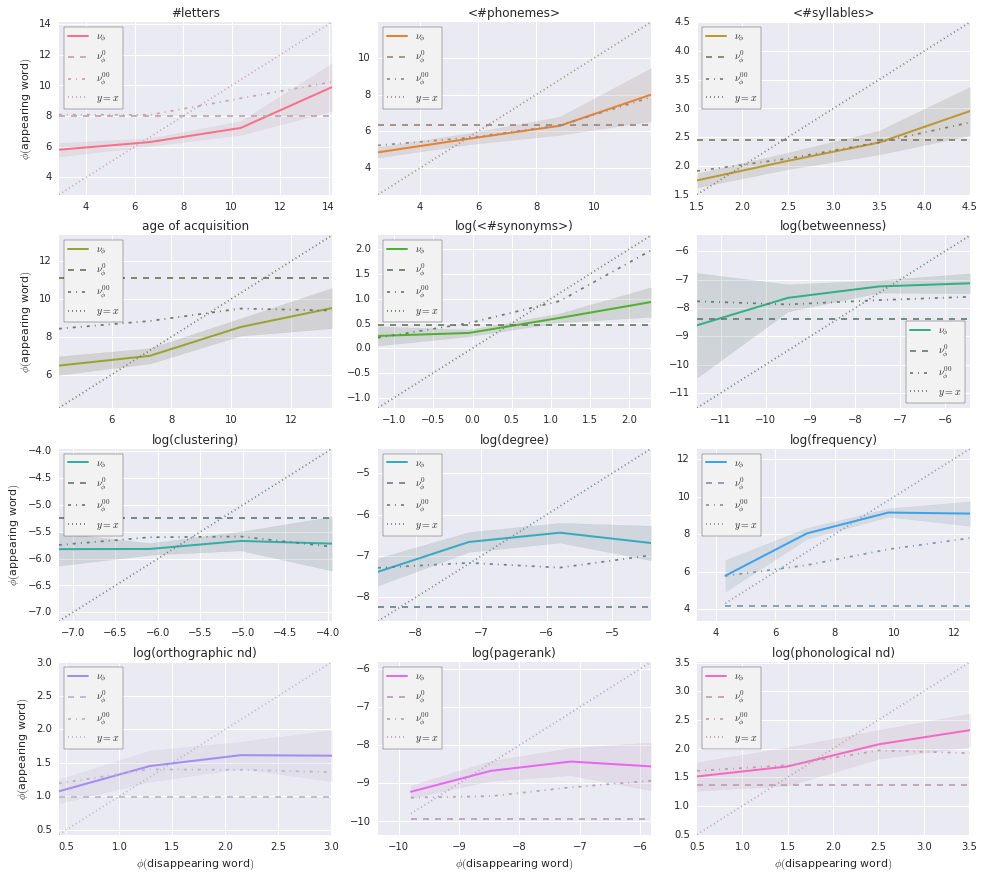

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

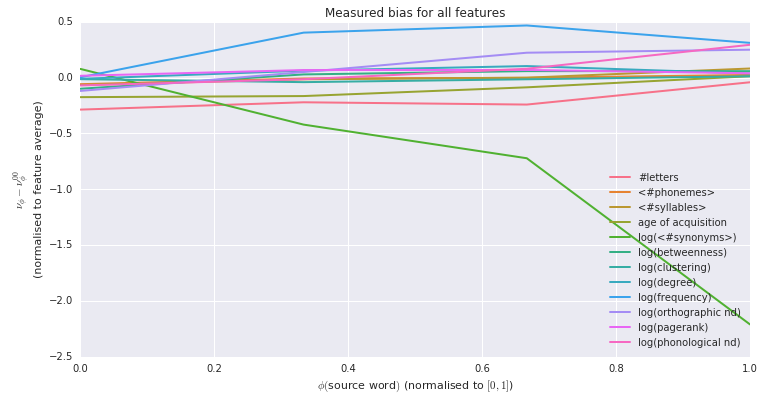

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | ns. | *   | ns. |


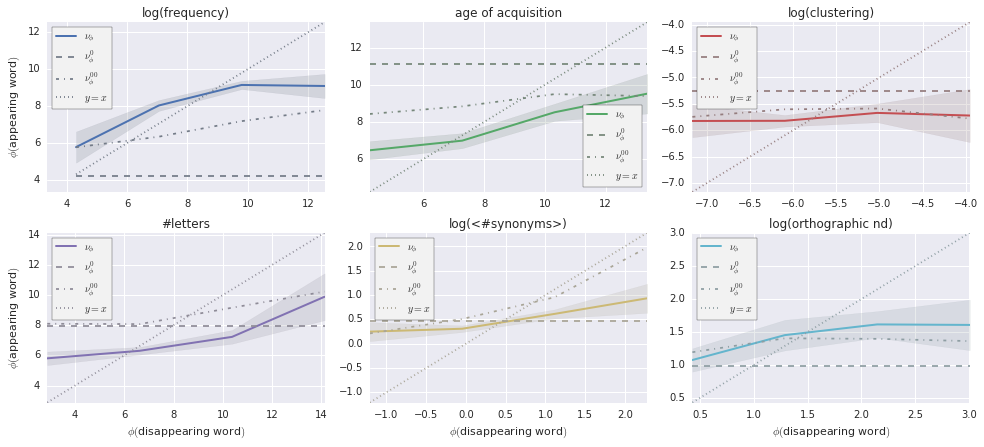

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

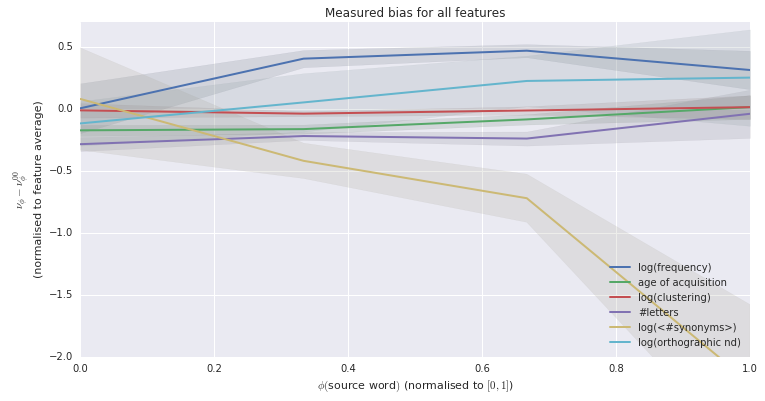

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | **  | **  | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *   | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | **  | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | **  | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | **  | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | **  |


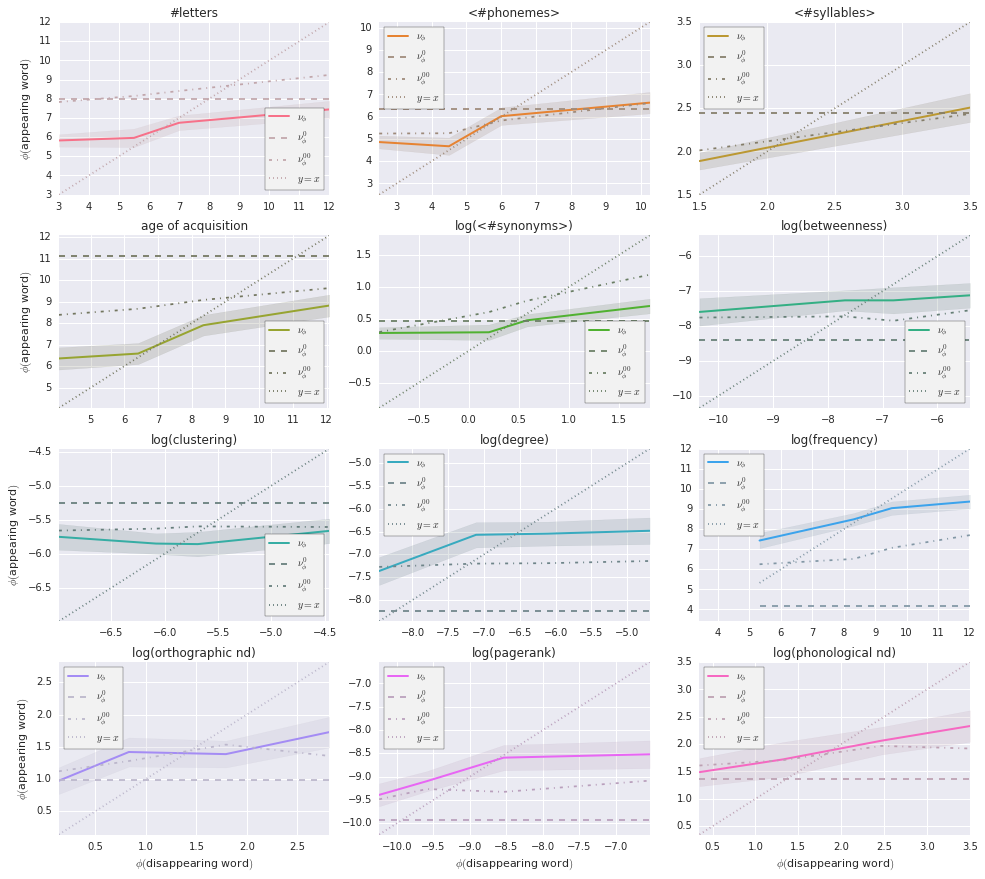

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

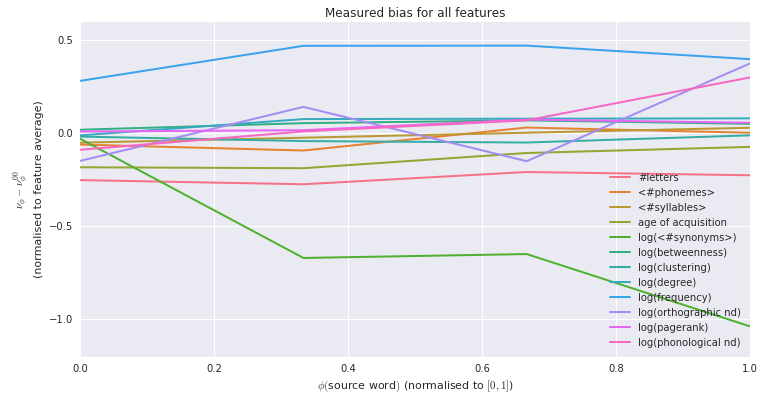

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


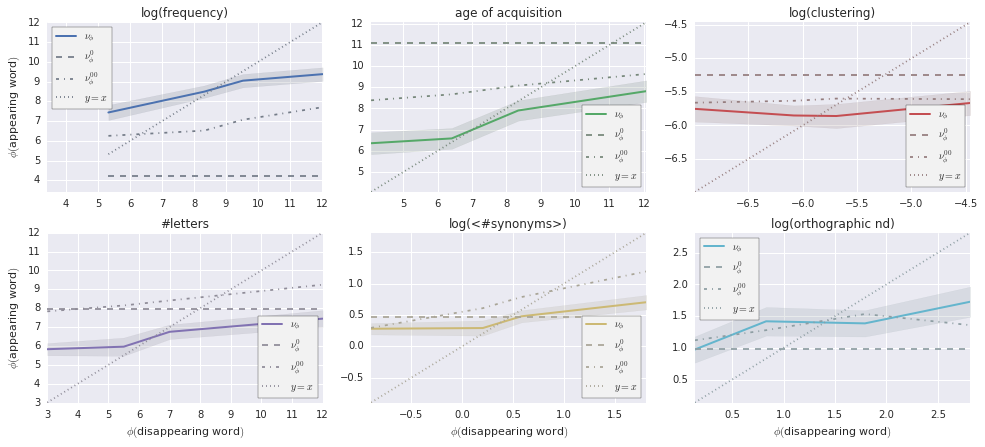

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

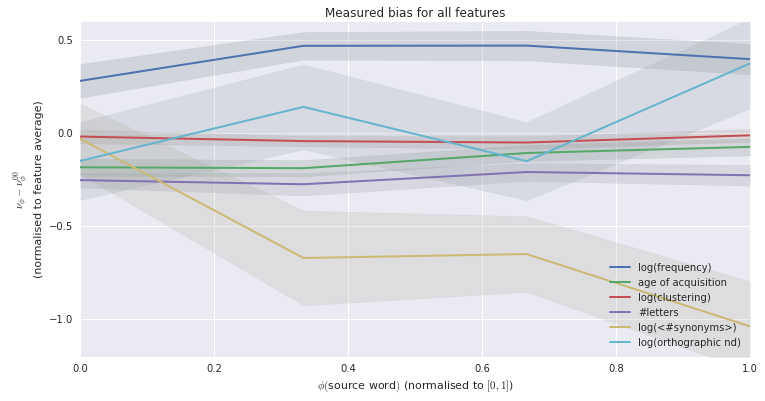

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *   |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *   | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | ns. | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *   | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | *   |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *** | *   |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


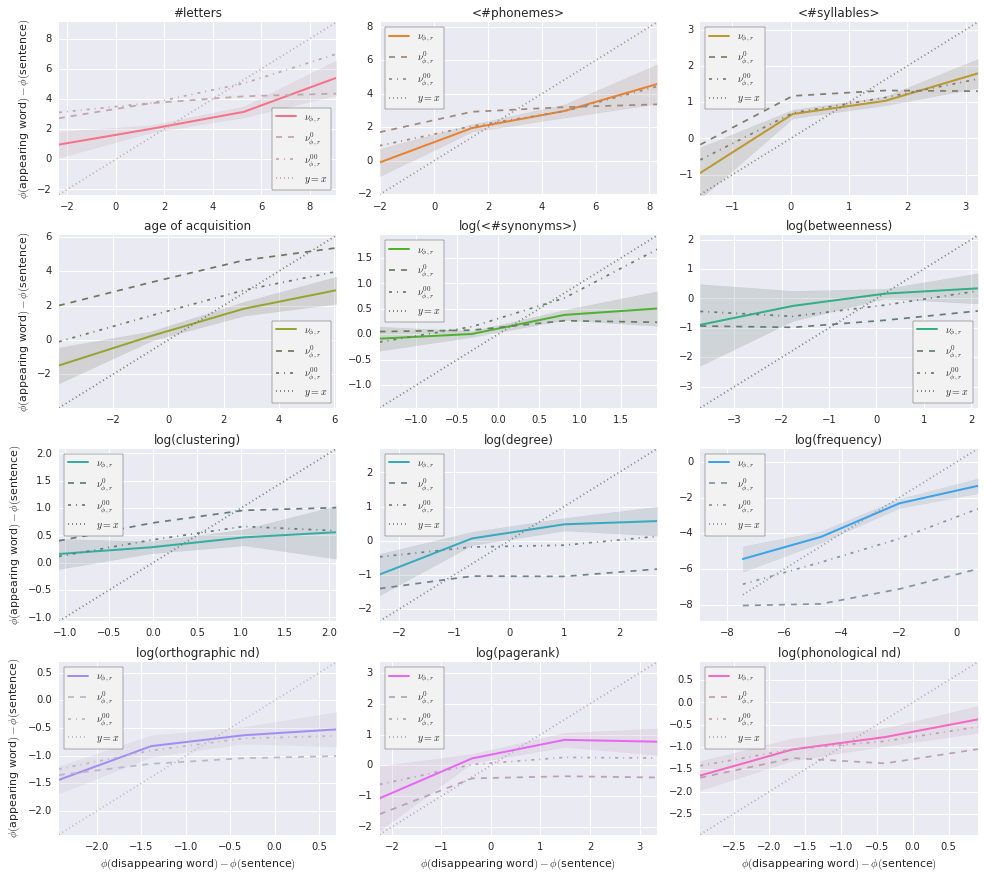

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

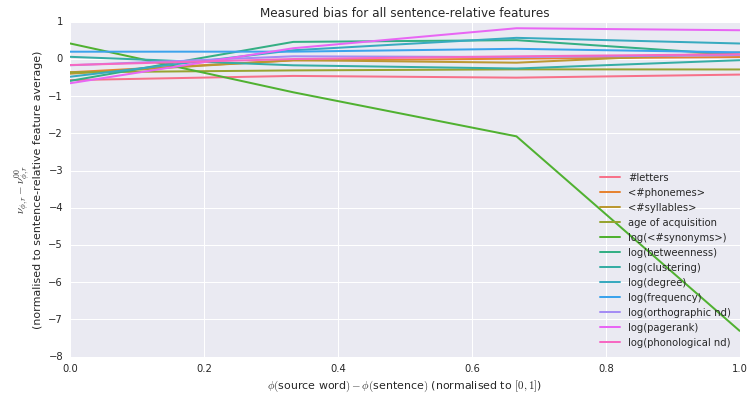

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *   | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | **  |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *   | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | ns. | ns. | ns. |


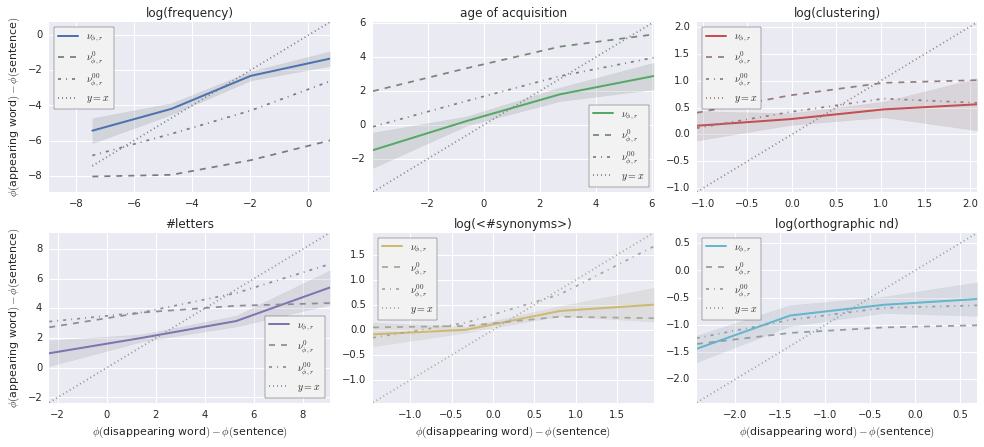

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

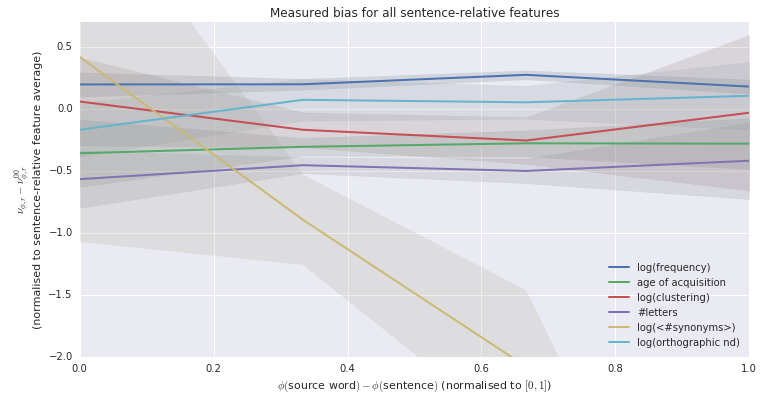

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | ns. | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |
H_00 | ns. | **  | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *   | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | ns. | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


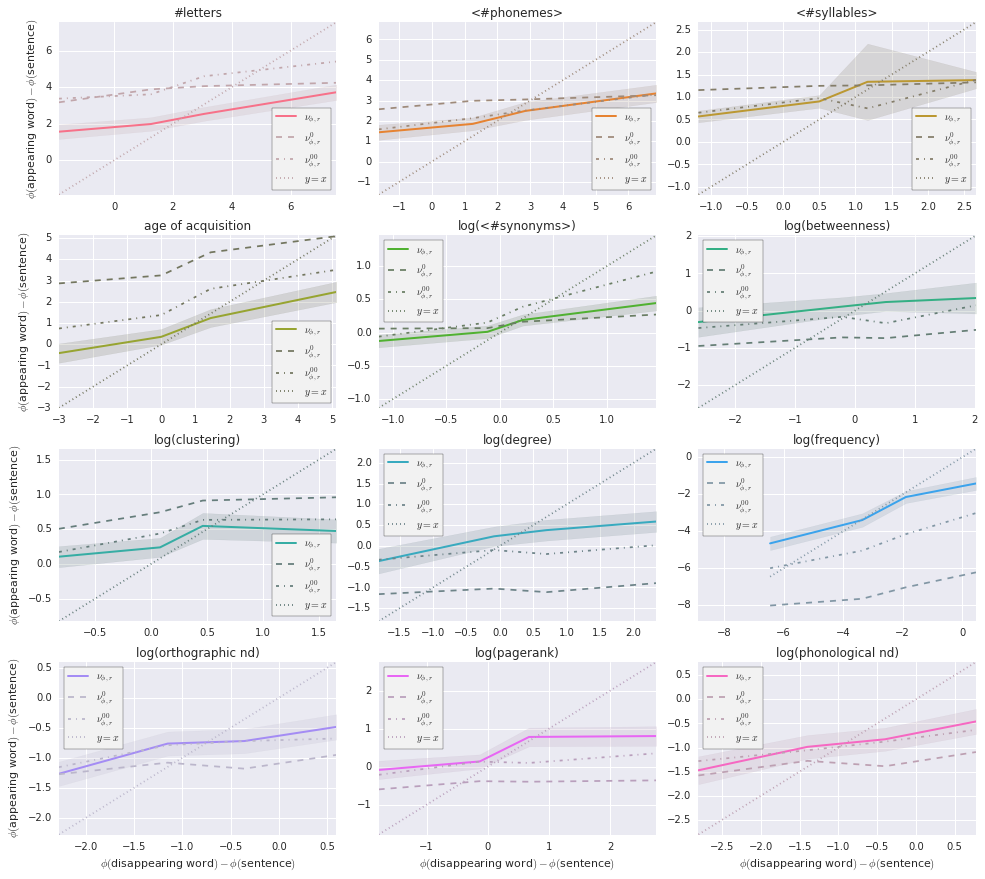

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

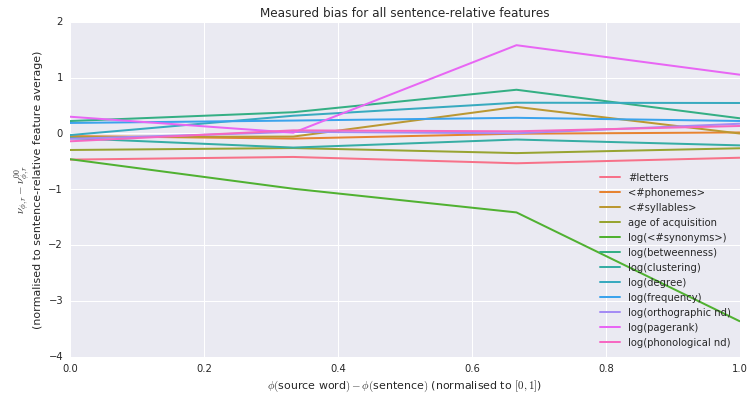

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |
H_00 | ns. | **  | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


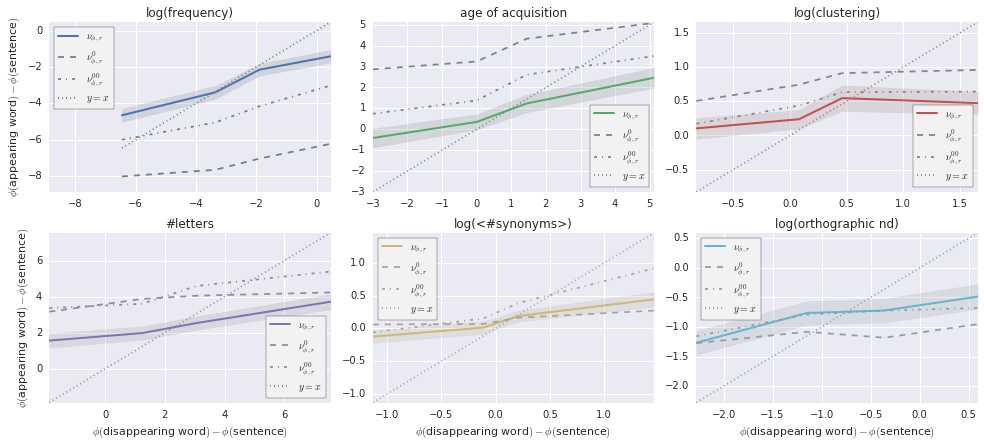

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

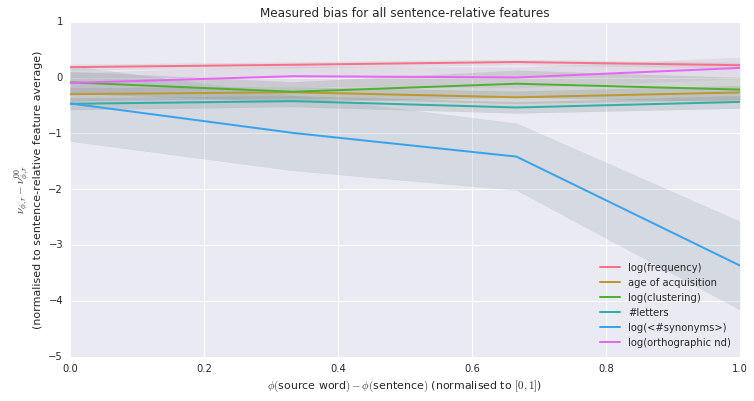

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


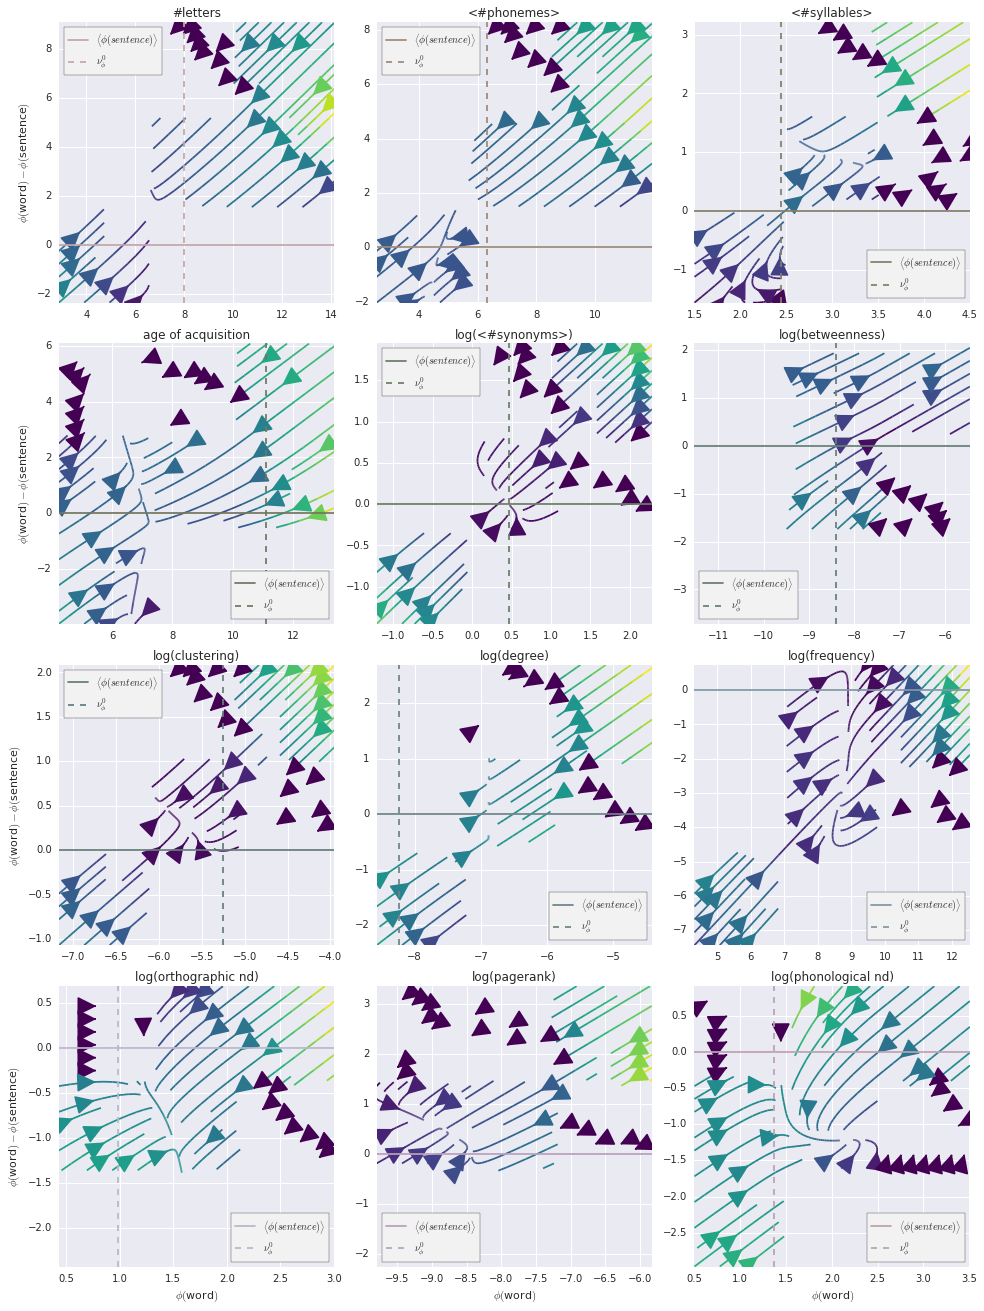

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


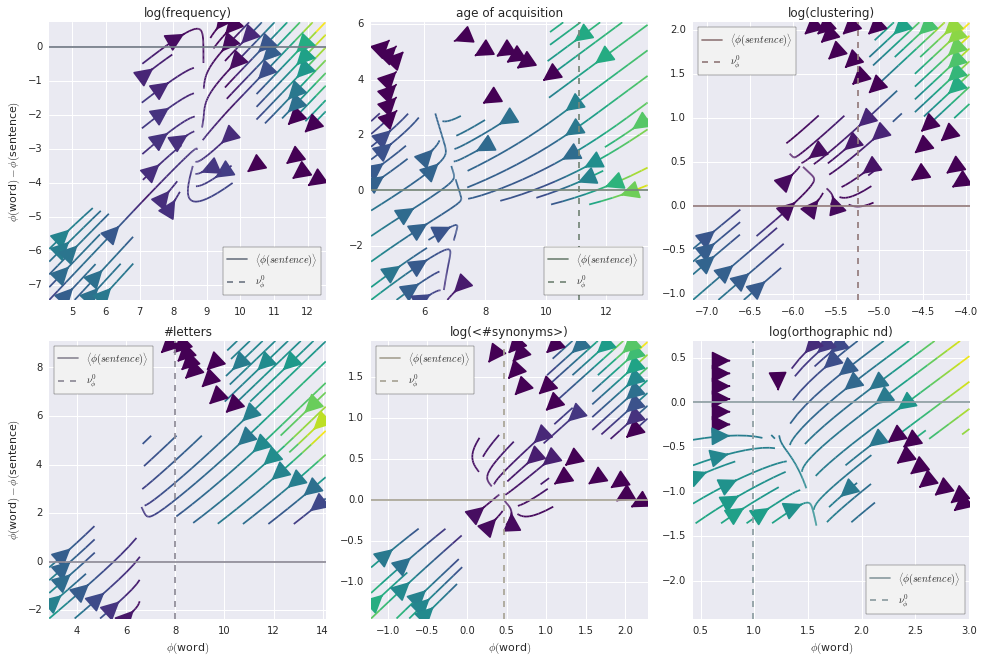

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54135829  0.17744755  0.07176496  0.07130394  0.03529199  0.0285309
  0.02038716  0.01818248  0.01400208  0.00971662]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.463937,0.242983,-0.091234,0.236037,0.221445,-0.458947,0.218019,0.264778,-0.421182,0.280782,-0.167703,-0.004282
Component-1,0.386310,-0.363836,0.144710,-0.277832,-0.283946,-0.396128,0.121129,-0.294111,-0.461663,0.203369,-0.163799,0.014763
Component-2,-0.706621,-0.321573,0.048700,-0.071202,-0.596543,0.058636,0.071099,-0.096863,0.065361,-0.086535,0.043194,0.049717


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 4417) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  10 of 4417) |                       | Elapsed Time: 0:00:40 ETA: 4:58:28

  0% (  31 of 4417) |                       | Elapsed Time: 0:00:40 ETA: 1:36:19

  1% (  56 of 4417) |                       | Elapsed Time: 0:00:41 ETA: 0:54:15

  1% (  83 of 4417) |                       | Elapsed Time: 0:00:41 ETA: 0:35:55

  2% ( 111 of 4417) |                       | Elapsed Time: 0:00:41 ETA: 0:00:38

  3% ( 136 of 4417) |                       | Elapsed Time: 0:00:41 ETA: 0:00:35

  3% ( 151 of 4417) |                       | Elapsed Time: 0:00:41 ETA: 0:00:38

  3% ( 175 of 4417) |                       | Elapsed Time: 0:00:42 ETA: 0:00:43

  4% ( 197 of 4417) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:43

  5% ( 236 of 4417) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:40

  5% ( 262 of 4417) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:38

  6% ( 287 of 4417) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:37

  6% ( 307 of 4417) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:36

  7% ( 332 of 4417) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:38

  7% ( 352 of 4417) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:43

  8% ( 372 of 4417) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:44

  8% ( 397 of 4417) |##                     | Elapsed Time: 0:00:44 ETA: 0:00:44

  9% ( 417 of 4417) |##                     | Elapsed Time: 0:00:44 ETA: 0:00:43

 10% ( 442 of 4417) |##                     | Elapsed Time: 0:00:44 ETA: 0:00:43

 10% ( 460 of 4417) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:43

 10% ( 479 of 4417) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:43

 11% ( 497 of 4417) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:43

 11% ( 517 of 4417) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:43

 12% ( 536 of 4417) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:43

 12% ( 563 of 4417) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:42

 13% ( 586 of 4417) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:40

 13% ( 608 of 4417) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:39

 14% ( 630 of 4417) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:38

 15% ( 663 of 4417) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:36

 15% ( 690 of 4417) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:33

 16% ( 708 of 4417) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:33

 16% ( 728 of 4417) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:34

 16% ( 748 of 4417) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:33

 17% ( 773 of 4417) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:37

 17% ( 793 of 4417) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:36

 18% ( 813 of 4417) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:36

 19% ( 842 of 4417) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:35

 19% ( 868 of 4417) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:33

 20% ( 896 of 4417) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:33

 20% ( 925 of 4417) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:31

 21% ( 952 of 4417) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:29

 22% ( 977 of 4417) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:29

 22% (1007 of 4417) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:27

 23% (1035 of 4417) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:26

 24% (1063 of 4417) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:27

 24% (1092 of 4417) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:25

 25% (1119 of 4417) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:25

 25% (1144 of 4417) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:26

 26% (1170 of 4417) |######                 | Elapsed Time: 0:00:51 ETA: 0:00:26

 27% (1195 of 4417) |######                 | Elapsed Time: 0:00:51 ETA: 0:00:26

 27% (1227 of 4417) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:26

 28% (1251 of 4417) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:26

 29% (1284 of 4417) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:25

 29% (1310 of 4417) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:24

 30% (1335 of 4417) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:25

 30% (1363 of 4417) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:24

 31% (1395 of 4417) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:24

 32% (1436 of 4417) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:23

 33% (1469 of 4417) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:21

 34% (1503 of 4417) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:21

 34% (1529 of 4417) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:21

 35% (1559 of 4417) |########               | Elapsed Time: 0:00:54 ETA: 0:00:21

 35% (1583 of 4417) |########               | Elapsed Time: 0:00:54 ETA: 0:00:22

 36% (1615 of 4417) |########               | Elapsed Time: 0:00:55 ETA: 0:00:22

 37% (1639 of 4417) |########               | Elapsed Time: 0:00:55 ETA: 0:00:22

 37% (1670 of 4417) |########               | Elapsed Time: 0:00:55 ETA: 0:00:22

 38% (1702 of 4417) |########               | Elapsed Time: 0:00:55 ETA: 0:00:21

 38% (1720 of 4417) |########               | Elapsed Time: 0:00:55 ETA: 0:00:22

 39% (1747 of 4417) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:22

 40% (1781 of 4417) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:20

 41% (1823 of 4417) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:20

 41% (1848 of 4417) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:20

 42% (1878 of 4417) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:19

 43% (1902 of 4417) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:19

 43% (1933 of 4417) |##########             | Elapsed Time: 0:00:57 ETA: 0:00:19

 44% (1956 of 4417) |##########             | Elapsed Time: 0:00:57 ETA: 0:00:21

 45% (1988 of 4417) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:20

 45% (2014 of 4417) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:20

 46% (2043 of 4417) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:20

 46% (2069 of 4417) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:18

 47% (2099 of 4417) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:17

 48% (2129 of 4417) |###########            | Elapsed Time: 0:00:59 ETA: 0:00:17

 49% (2165 of 4417) |###########            | Elapsed Time: 0:00:59 ETA: 0:00:16

 49% (2189 of 4417) |###########            | Elapsed Time: 0:00:59 ETA: 0:00:16

 50% (2225 of 4417) |###########            | Elapsed Time: 0:00:59 ETA: 0:00:16

 51% (2264 of 4417) |###########            | Elapsed Time: 0:01:00 ETA: 0:00:16

 51% (2290 of 4417) |###########            | Elapsed Time: 0:01:00 ETA: 0:00:16

 52% (2319 of 4417) |############           | Elapsed Time: 0:01:00 ETA: 0:00:17

 53% (2346 of 4417) |############           | Elapsed Time: 0:01:00 ETA: 0:00:16

 53% (2375 of 4417) |############           | Elapsed Time: 0:01:01 ETA: 0:00:16

 54% (2393 of 4417) |############           | Elapsed Time: 0:01:01 ETA: 0:00:17

 55% (2430 of 4417) |############           | Elapsed Time: 0:01:01 ETA: 0:00:16

 55% (2461 of 4417) |############           | Elapsed Time: 0:01:01 ETA: 0:00:15

 56% (2485 of 4417) |############           | Elapsed Time: 0:01:02 ETA: 0:00:14

 56% (2510 of 4417) |#############          | Elapsed Time: 0:01:02 ETA: 0:00:15

 57% (2540 of 4417) |#############          | Elapsed Time: 0:01:02 ETA: 0:00:14

 57% (2561 of 4417) |#############          | Elapsed Time: 0:01:02 ETA: 0:00:14

 58% (2573 of 4417) |#############          | Elapsed Time: 0:01:02 ETA: 0:00:17

 59% (2609 of 4417) |#############          | Elapsed Time: 0:01:03 ETA: 0:00:16

 59% (2640 of 4417) |#############          | Elapsed Time: 0:01:03 ETA: 0:00:15

 60% (2657 of 4417) |#############          | Elapsed Time: 0:01:03 ETA: 0:00:17

 60% (2677 of 4417) |#############          | Elapsed Time: 0:01:03 ETA: 0:00:15

 61% (2717 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:14

 61% (2734 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:16

 62% (2777 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:14

 63% (2801 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:12

 64% (2830 of 4417) |##############         | Elapsed Time: 0:01:04 ETA: 0:00:12

 65% (2872 of 4417) |##############         | Elapsed Time: 0:01:05 ETA: 0:00:11

 65% (2897 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:11

 66% (2927 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:11

 66% (2956 of 4417) |###############        | Elapsed Time: 0:01:05 ETA: 0:00:11

 67% (2982 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:11

 68% (3007 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:11

 68% (3037 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:11

 69% (3066 of 4417) |###############        | Elapsed Time: 0:01:06 ETA: 0:00:10

 70% (3108 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:10

 71% (3148 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:09

 72% (3181 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:08

 72% (3220 of 4417) |################       | Elapsed Time: 0:01:07 ETA: 0:00:08

 73% (3258 of 4417) |################       | Elapsed Time: 0:01:08 ETA: 0:00:07

 74% (3282 of 4417) |#################      | Elapsed Time: 0:01:08 ETA: 0:00:07

 75% (3313 of 4417) |#################      | Elapsed Time: 0:01:08 ETA: 0:00:07

 75% (3337 of 4417) |#################      | Elapsed Time: 0:01:08 ETA: 0:00:08

 76% (3357 of 4417) |#################      | Elapsed Time: 0:01:08 ETA: 0:00:09

 76% (3381 of 4417) |#################      | Elapsed Time: 0:01:09 ETA: 0:00:09

 77% (3406 of 4417) |#################      | Elapsed Time: 0:01:09 ETA: 0:00:09

 77% (3440 of 4417) |#################      | Elapsed Time: 0:01:09 ETA: 0:00:09

 78% (3479 of 4417) |##################     | Elapsed Time: 0:01:09 ETA: 0:00:08

 79% (3504 of 4417) |##################     | Elapsed Time: 0:01:10 ETA: 0:00:07

 79% (3528 of 4417) |##################     | Elapsed Time: 0:01:10 ETA: 0:00:07

 80% (3539 of 4417) |##################     | Elapsed Time: 0:01:10 ETA: 0:00:07

 80% (3549 of 4417) |##################     | Elapsed Time: 0:01:10 ETA: 0:00:09

 81% (3589 of 4417) |##################     | Elapsed Time: 0:01:11 ETA: 0:00:09

 81% (3614 of 4417) |##################     | Elapsed Time: 0:01:11 ETA: 0:00:08

 82% (3645 of 4417) |##################     | Elapsed Time: 0:01:11 ETA: 0:00:07

 83% (3670 of 4417) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:06

 83% (3686 of 4417) |###################    | Elapsed Time: 0:01:12 ETA: 0:00:06

 84% (3716 of 4417) |###################    | Elapsed Time: 0:01:12 ETA: 0:00:06

 85% (3755 of 4417) |###################    | Elapsed Time: 0:01:12 ETA: 0:00:05

 85% (3781 of 4417) |###################    | Elapsed Time: 0:01:12 ETA: 0:00:05

 86% (3810 of 4417) |###################    | Elapsed Time: 0:01:12 ETA: 0:00:05

 86% (3836 of 4417) |###################    | Elapsed Time: 0:01:13 ETA: 0:00:04

 87% (3865 of 4417) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:04

 87% (3885 of 4417) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:04

 88% (3921 of 4417) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:04

 89% (3952 of 4417) |####################   | Elapsed Time: 0:01:14 ETA: 0:00:03

 90% (3993 of 4417) |####################   | Elapsed Time: 0:01:14 ETA: 0:00:03

 91% (4031 of 4417) |####################   | Elapsed Time: 0:01:14 ETA: 0:00:02

 91% (4062 of 4417) |#####################  | Elapsed Time: 0:01:14 ETA: 0:00:02

 92% (4086 of 4417) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:02

 93% (4112 of 4417) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:02

 93% (4141 of 4417) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:02

 94% (4170 of 4417) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:01

 95% (4212 of 4417) |#####################  | Elapsed Time: 0:01:16 ETA: 0:00:01

 96% (4241 of 4417) |###################### | Elapsed Time: 0:01:16 ETA: 0:00:01

 96% (4266 of 4417) |###################### | Elapsed Time: 0:01:16 ETA: 0:00:01

 97% (4291 of 4417) |###################### | Elapsed Time: 0:01:16 ETA: 0:00:00

 97% (4323 of 4417) |###################### | Elapsed Time: 0:01:16 ETA: 0:00:00

 98% (4346 of 4417) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:00

 99% (4375 of 4417) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:00

100% (4417 of 4417) |######################| Elapsed Time: 0:01:17 Time: 0:01:17


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | *   | *** | *   |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *   | **  | ns. |


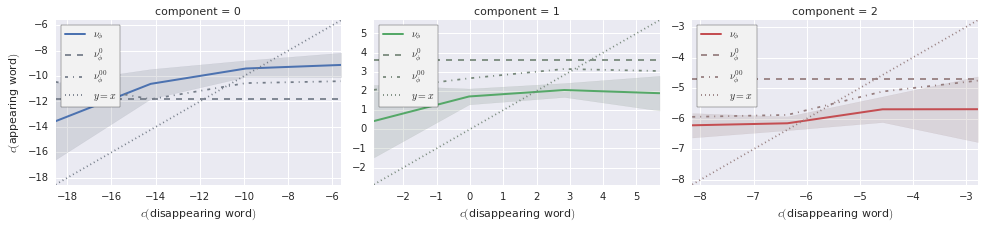

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.64406974  0.21304137]



,aoa,frequency,letters_count
Component-0,-0.745493,0.338447,-0.574189
Component-1,0.411159,-0.444515,-0.795836


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 4417) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 4417) |                       | Elapsed Time: 0:00:02 ETA: 0:13:31

  1% (  56 of 4417) |                       | Elapsed Time: 0:00:03 ETA: 0:04:59

  2% (  91 of 4417) |                       | Elapsed Time: 0:00:03 ETA: 0:02:43

  2% ( 127 of 4417) |                       | Elapsed Time: 0:00:03 ETA: 0:02:03

  3% ( 152 of 4417) |                       | Elapsed Time: 0:00:03 ETA: 0:00:28

  4% ( 180 of 4417) |                       | Elapsed Time: 0:00:04 ETA: 0:00:29

  5% ( 221 of 4417) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:29

  5% ( 256 of 4417) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:27

  6% ( 290 of 4417) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:29

  7% ( 316 of 4417) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:28

  7% ( 345 of 4417) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:28

  8% ( 371 of 4417) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:30

  9% ( 400 of 4417) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:31

  9% ( 426 of 4417) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:31

 10% ( 455 of 4417) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:31

 10% ( 481 of 4417) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:31

 11% ( 510 of 4417) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:31

 12% ( 535 of 4417) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:31

 12% ( 567 of 4417) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:30

 13% ( 608 of 4417) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:29

 14% ( 636 of 4417) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:28

 15% ( 680 of 4417) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:26

 16% ( 718 of 4417) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:25

 16% ( 747 of 4417) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:25

 17% ( 788 of 4417) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:25

 18% ( 829 of 4417) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:24

 19% ( 864 of 4417) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:24

 20% ( 901 of 4417) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:23

 21% ( 939 of 4417) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:22

 22% ( 972 of 4417) |#####                  | Elapsed Time: 0:00:09 ETA: 0:00:21

 22% (1012 of 4417) |#####                  | Elapsed Time: 0:00:09 ETA: 0:00:21

 23% (1050 of 4417) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:20

 24% (1087 of 4417) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:19

 25% (1124 of 4417) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:19

 26% (1160 of 4417) |######                 | Elapsed Time: 0:00:10 ETA: 0:00:19

 26% (1192 of 4417) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:19

 27% (1231 of 4417) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:19

 28% (1270 of 4417) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:19

 29% (1305 of 4417) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:19

 30% (1340 of 4417) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:19

 31% (1381 of 4417) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:18

 32% (1436 of 4417) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:17

 33% (1473 of 4417) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:17

 34% (1508 of 4417) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:16

 35% (1546 of 4417) |########               | Elapsed Time: 0:00:13 ETA: 0:00:16

 35% (1580 of 4417) |########               | Elapsed Time: 0:00:13 ETA: 0:00:16

 36% (1619 of 4417) |########               | Elapsed Time: 0:00:13 ETA: 0:00:16

 37% (1657 of 4417) |########               | Elapsed Time: 0:00:13 ETA: 0:00:16

 38% (1694 of 4417) |########               | Elapsed Time: 0:00:14 ETA: 0:00:16

 39% (1728 of 4417) |########               | Elapsed Time: 0:00:14 ETA: 0:00:16

 40% (1767 of 4417) |#########              | Elapsed Time: 0:00:14 ETA: 0:00:15

 40% (1803 of 4417) |#########              | Elapsed Time: 0:00:14 ETA: 0:00:15

 41% (1839 of 4417) |#########              | Elapsed Time: 0:00:14 ETA: 0:00:15

 42% (1878 of 4417) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:15

 43% (1909 of 4417) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:15

 44% (1948 of 4417) |##########             | Elapsed Time: 0:00:15 ETA: 0:00:15

 45% (1988 of 4417) |##########             | Elapsed Time: 0:00:15 ETA: 0:00:16

 45% (2021 of 4417) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:15

 46% (2060 of 4417) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:15

 47% (2099 of 4417) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:14

 48% (2135 of 4417) |###########            | Elapsed Time: 0:00:16 ETA: 0:00:13

 49% (2170 of 4417) |###########            | Elapsed Time: 0:00:16 ETA: 0:00:13

 50% (2209 of 4417) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:12

 50% (2244 of 4417) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:12

 51% (2280 of 4417) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:12

 52% (2319 of 4417) |############           | Elapsed Time: 0:00:17 ETA: 0:00:12

 53% (2353 of 4417) |############           | Elapsed Time: 0:00:18 ETA: 0:00:12

 54% (2388 of 4417) |############           | Elapsed Time: 0:00:18 ETA: 0:00:12

 55% (2430 of 4417) |############           | Elapsed Time: 0:00:18 ETA: 0:00:12

 55% (2466 of 4417) |############           | Elapsed Time: 0:00:18 ETA: 0:00:11

 56% (2501 of 4417) |#############          | Elapsed Time: 0:00:18 ETA: 0:00:11

 57% (2540 of 4417) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:11

 58% (2566 of 4417) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:11

 58% (2595 of 4417) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:11

 59% (2632 of 4417) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:11

 60% (2662 of 4417) |#############          | Elapsed Time: 0:00:20 ETA: 0:00:11

 61% (2706 of 4417) |##############         | Elapsed Time: 0:00:20 ETA: 0:00:11

 61% (2734 of 4417) |##############         | Elapsed Time: 0:00:20 ETA: 0:00:11

 62% (2779 of 4417) |##############         | Elapsed Time: 0:00:20 ETA: 0:00:10

 63% (2816 of 4417) |##############         | Elapsed Time: 0:00:20 ETA: 0:00:10

 64% (2850 of 4417) |##############         | Elapsed Time: 0:00:21 ETA: 0:00:09

 65% (2890 of 4417) |###############        | Elapsed Time: 0:00:21 ETA: 0:00:09

 66% (2927 of 4417) |###############        | Elapsed Time: 0:00:21 ETA: 0:00:08

 67% (2962 of 4417) |###############        | Elapsed Time: 0:00:21 ETA: 0:00:08

 67% (2998 of 4417) |###############        | Elapsed Time: 0:00:22 ETA: 0:00:08

 68% (3037 of 4417) |###############        | Elapsed Time: 0:00:22 ETA: 0:00:08

 69% (3074 of 4417) |################       | Elapsed Time: 0:00:22 ETA: 0:00:08

 70% (3111 of 4417) |################       | Elapsed Time: 0:00:22 ETA: 0:00:07

 71% (3148 of 4417) |################       | Elapsed Time: 0:00:22 ETA: 0:00:07

 72% (3203 of 4417) |################       | Elapsed Time: 0:00:23 ETA: 0:00:07

 73% (3242 of 4417) |################       | Elapsed Time: 0:00:23 ETA: 0:00:06

 74% (3274 of 4417) |#################      | Elapsed Time: 0:00:23 ETA: 0:00:06

 75% (3313 of 4417) |#################      | Elapsed Time: 0:00:23 ETA: 0:00:06

 75% (3346 of 4417) |#################      | Elapsed Time: 0:00:24 ETA: 0:00:06

 76% (3385 of 4417) |#################      | Elapsed Time: 0:00:24 ETA: 0:00:06

 77% (3424 of 4417) |#################      | Elapsed Time: 0:00:24 ETA: 0:00:06

 78% (3461 of 4417) |##################     | Elapsed Time: 0:00:24 ETA: 0:00:05

 79% (3496 of 4417) |##################     | Elapsed Time: 0:00:25 ETA: 0:00:05

 80% (3534 of 4417) |##################     | Elapsed Time: 0:00:25 ETA: 0:00:05

 80% (3554 of 4417) |##################     | Elapsed Time: 0:00:25 ETA: 0:00:05

 81% (3607 of 4417) |##################     | Elapsed Time: 0:00:25 ETA: 0:00:05

 82% (3645 of 4417) |##################     | Elapsed Time: 0:00:25 ETA: 0:00:04

 83% (3677 of 4417) |###################    | Elapsed Time: 0:00:26 ETA: 0:00:04

 84% (3720 of 4417) |###################    | Elapsed Time: 0:00:26 ETA: 0:00:04

 85% (3771 of 4417) |###################    | Elapsed Time: 0:00:26 ETA: 0:00:03

 86% (3810 of 4417) |###################    | Elapsed Time: 0:00:27 ETA: 0:00:03

 87% (3845 of 4417) |####################   | Elapsed Time: 0:00:27 ETA: 0:00:03

 87% (3881 of 4417) |####################   | Elapsed Time: 0:00:27 ETA: 0:00:03

 88% (3921 of 4417) |####################   | Elapsed Time: 0:00:27 ETA: 0:00:02

 89% (3957 of 4417) |####################   | Elapsed Time: 0:00:27 ETA: 0:00:02

 90% (3996 of 4417) |####################   | Elapsed Time: 0:00:28 ETA: 0:00:02

 91% (4050 of 4417) |#####################  | Elapsed Time: 0:00:28 ETA: 0:00:02

 92% (4086 of 4417) |#####################  | Elapsed Time: 0:00:28 ETA: 0:00:01

 93% (4122 of 4417) |#####################  | Elapsed Time: 0:00:28 ETA: 0:00:01

 94% (4159 of 4417) |#####################  | Elapsed Time: 0:00:29 ETA: 0:00:01

 95% (4197 of 4417) |#####################  | Elapsed Time: 0:00:29 ETA: 0:00:01

 95% (4234 of 4417) |###################### | Elapsed Time: 0:00:29 ETA: 0:00:01

 96% (4270 of 4417) |###################### | Elapsed Time: 0:00:29 ETA: 0:00:00

 97% (4307 of 4417) |###################### | Elapsed Time: 0:00:29 ETA: 0:00:00

 98% (4342 of 4417) |###################### | Elapsed Time: 0:00:30 ETA: 0:00:00

 99% (4380 of 4417) |###################### | Elapsed Time: 0:00:30 ETA: 0:00:00

100% (4417 of 4417) |######################| Elapsed Time: 0:00:30 Time: 0:00:30


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |


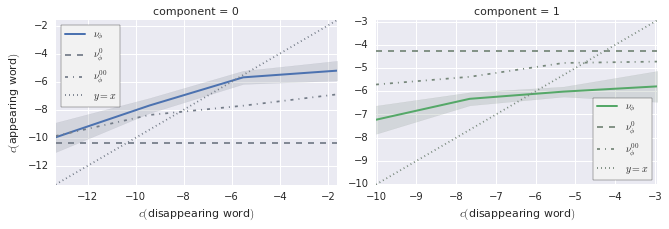

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 620 (cluster-unique) substitutions, but the PCA is in fact computed on 471 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
    * global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 363 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.04921646667188051

intercept                      8.305603
global_aoa                    -0.039234
global_clustering              0.257282
global_frequency               0.291896
global_letters_count          -0.008305
global_orthographic_density   -0.170180
global_synonyms_count          0.052503
dtype: float64

Regressing global frequency with 363 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.1281874942778527

intercept                                              9.952529
global_aoa                                            -1.014514
global_clustering                                      0.202186
global_frequency                                       0.686849
global_letters_count                                  -0.447581
global_orthographic_density                            1.257273
global_synon

Regressing rel frequency with 363 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.4768587718178876

intercept                                                 13.092356
global_aoa                                                 0.617633
global_clustering                                         -5.106817
global_frequency                                          -2.460141
global_letters_count                                      -6.050267
global_orthographic_density                                4.104504
global_synonyms_count                                     -7.462766
rel_aoa                                                    0.761614
rel_clustering                                             1.549935
rel_frequency                                              0.362455
rel_letters_count                                          3.195183
rel_orthographic_density                                   2.594602
rel_synonyms_count                                        22.371761
glo

Regressing global aoa with 325 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.3504405793764501

intercept                                                 31.557588
global_aoa                                                 3.627129
global_clustering                                          9.441600
global_frequency                                           0.826839
global_letters_count                                      -0.223904
global_orthographic_density                              -15.210884
global_synonyms_count                                    -25.988039
rel_aoa                                                   -2.474572
rel_clustering                                             5.360760
rel_frequency                                              3.602362
rel_letters_count                                          5.452400
rel_orthographic_density                                   9.841188
rel_synonyms_count                                        14.495816
global_ao

Regressing rel clustering with 284 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.0562417365160538

intercept                   0.254823
rel_aoa                    -0.029885
rel_clustering              0.222561
rel_frequency              -0.022388
rel_letters_count          -0.007515
rel_orthographic_density   -0.014645
rel_synonyms_count         -0.019609
dtype: float64

Regressing rel clustering with 284 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.11092621276261183

intercept                                        0.286082
rel_aoa                                         -0.008795
rel_clustering                                   0.168344
rel_frequency                                   -0.010816
rel_letters_count                                0.010252
rel_orthographic_density                         0.022339
rel_synonyms_count                              -0.055970
rel_aoa * rel_clustering                        -0.021617
rel_aoa * rel_frequency         

Regressing rel letters_count with 363 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.09327713034980634

intercept                                             -18.206701
global_aoa                                              1.326274
global_clustering                                      -3.674324
global_frequency                                        1.089939
global_letters_count                                    0.320409
global_orthographic_density                            -3.101788
global_synonyms_count                                   2.132430
global_aoa * global_clustering                          0.145687
global_aoa * global_frequency                           0.018049
global_aoa * global_letters_count                      -0.097388
global_aoa * global_orthographic_density               -0.060516
global_aoa * global_synonyms_count                      0.076616
global_clustering * global_frequency                    0.327542
global_clustering * global_letter

Regressing global synonyms_count with 353 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10150456090149362

intercept                                             -0.314684
global_aoa                                             0.276878
global_clustering                                      0.295852
global_frequency                                       0.052537
global_letters_count                                   0.132992
global_orthographic_density                            0.149330
global_synonyms_count                                 -0.591193
global_aoa * global_clustering                        -0.015769
global_aoa * global_frequency                         -0.026165
global_aoa * global_letters_count                     -0.015914
global_aoa * global_orthographic_density              -0.027867
global_aoa * global_synonyms_count                     0.019086
global_clustering * global_frequency                  -0.022070
global_clustering * global_letters_cou

Regressing rel synonyms_count with 353 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.3928768799899093

intercept                                                 -2.869870
global_aoa                                                 1.036140
global_clustering                                          1.347739
global_frequency                                          -0.268956
global_letters_count                                       0.273281
global_orthographic_density                                4.213503
global_synonyms_count                                      6.317736
rel_aoa                                                    0.059147
rel_clustering                                            -2.328268
rel_frequency                                              0.187479
rel_letters_count                                         -0.397754
rel_orthographic_density                                  -3.464210
rel_synonyms_count                                       -11.

R^2 = 0.2946937164356933

intercept                                                -2.549255
global_aoa                                               -0.029654
global_clustering                                         0.986358
global_frequency                                         -0.070905
global_letters_count                                      1.594180
global_orthographic_density                               5.034105
global_synonyms_count                                     0.028281
rel_aoa                                                  -0.953657
rel_clustering                                           -0.176725
rel_frequency                                            -0.868701
rel_letters_count                                        -1.482381
rel_orthographic_density                                 -3.438566
rel_synonyms_count                                        3.700232
global_aoa * global_clustering                           -0.128512
global_aoa * global_frequency       